In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
sc.settings.n_jobs = 40
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [2]:
adata = sc.read_h5ad("Data/Output_240308_adata_scvi_random_sampleID.h5ad")

In [3]:
meta = pd.read_csv("under_20_lineage_1_obs.csv")

In [4]:
meta

,Unnamed: 0,batch,sampleID,Age,Assay,Stage,Race,PMI,Hemisphere,Library,...,Cell Type,Stage2,palantir_pseudotime,palantir_entropy,Lineage_1,Lineage_2,Lineage_3,top_33_pseudotime,bottom_33_pseudotime,middle_33_pseudotime
0,10X187_2:AACACACCAACCGTGC,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,...,RG,Fetal (1st trimester),0.000000,0.910641,True,True,True,False,True,False
1,10X187_2:GCAACATCATCGATCA,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,...,RG,Fetal (1st trimester),0.000055,0.910641,True,True,True,False,True,False
2,10X187_2:TTGAGTGTCTACAGGT,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,...,RG,Fetal (1st trimester),0.000068,0.910641,True,True,True,False,True,False
3,10X187_2:ACAGGGAAGACGAGCT,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,...,RG,Fetal (1st trimester),0.000079,0.910641,True,True,True,False,True,False
4,10X185_8:AGTGCCGCAGTTAGAA,XDD:351,10X185_8,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,...,RG,Fetal (1st trimester),0.000090,0.910641,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54590,RL2108_GGTGTTAGTATACCCA-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,...,Ext,Neonatal,0.999770,0.027383,True,False,False,True,False,False
54591,RL2108_TAGATCGAGCTGACCC-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,...,Ext,Neonatal,0.999831,0.027294,True,False,False,True,False,False
54592,RL2108_AGACTCAAGTGCACTT-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,...,Ext,Neonatal,0.999900,0.027196,True,False,False,True,False,False
54593,RL2108_CTAACCCTCCTGTAAG-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,...,Ext,Neonatal,0.999962,0.027108,True,False,False,True,False,False


In [5]:
meta.set_index("Unnamed: 0", inplace=True)
meta

,batch,sampleID,Age,Assay,Stage,Race,PMI,Hemisphere,Library,Brain Region,...,Cell Type,Stage2,palantir_pseudotime,palantir_entropy,Lineage_1,Lineage_2,Lineage_3,top_33_pseudotime,bottom_33_pseudotime,middle_33_pseudotime
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
10X187_2:AACACACCAACCGTGC,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Cortex,...,RG,Fetal (1st trimester),0.000000,0.910641,True,True,True,False,True,False
10X187_2:GCAACATCATCGATCA,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Cortex,...,RG,Fetal (1st trimester),0.000055,0.910641,True,True,True,False,True,False
10X187_2:TTGAGTGTCTACAGGT,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Cortex,...,RG,Fetal (1st trimester),0.000068,0.910641,True,True,True,False,True,False
10X187_2:ACAGGGAAGACGAGCT,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Cortex,...,RG,Fetal (1st trimester),0.000079,0.910641,True,True,True,False,True,False
10X185_8:AGTGCCGCAGTTAGAA,XDD:351,10X185_8,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Subcortex,...,RG,Fetal (1st trimester),0.000090,0.910641,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RL2108_GGTGTTAGTATACCCA-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,BA9,...,Ext,Neonatal,0.999770,0.027383,True,False,False,True,False,False
RL2108_TAGATCGAGCTGACCC-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,BA9,...,Ext,Neonatal,0.999831,0.027294,True,False,False,True,False,False
RL2108_AGACTCAAGTGCACTT-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,BA9,...,Ext,Neonatal,0.999900,0.027196,True,False,False,True,False,False


In [6]:
adata.obs

,batch,sampleID,Age,Assay,Stage,Race,PMI,Hemisphere,Library,Brain Region,...,total_counts_mt,pct_counts_mt,doublet_scores,predicted_doublets,_scvi_batch,_scvi_labels,leiden_0.6,cluster_annotated,Leiden,Cell Type
10X119_2:TCGTACCCAGACAAAT,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,51.0,1.751374,0.062907,False,10,0,4,RG HES1 WNT1,C4,RG
10X119_2:AGAGCGACACCGCTAG,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,42.0,1.179775,0.035176,False,10,0,4,RG HES1 WNT1,C4,RG
10X119_2:AAGGAGCGTTGAGTTC,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,18.0,0.581583,0.035176,False,10,0,3,Neuroblast LINC01210,C3,Neuroblast
10X119_2:ATAGACCAGGGTGTTG,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,144.0,2.035911,0.027778,False,10,0,4,RG HES1 WNT1,C4,RG
10X119_2:TTAGGCATCCGAACGC,BRC2106A,10X119_2,60.199999,10x Chromium 3' v2,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Midbrain,...,33.0,0.997883,0.078049,False,10,0,4,RG HES1 WNT1,C4,RG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsDG99HC_TTTGTTGGTTCATCTT-1,Unknown,hsDG99HC,25550.000000,10x Chromium 3' v3,Adult (60-80Y),Unknown,Unknown,A,snRNA,BA9,...,1.0,0.027480,0.011442,False,112,0,13,Micro TYROBP DOCK8,C13,Micro
hsDG99HC_TTTGTTGTCATCTATC-1,Unknown,hsDG99HC,25550.000000,10x Chromium 3' v3,Adult (60-80Y),Unknown,Unknown,A,snRNA,BA9,...,9.0,0.169779,0.127273,False,112,0,0,Oligo OPALIN SEPHS1P6,C0,Oligo
hsDG99HC_TTTGTTGTCCTCGATC-1,Unknown,hsDG99HC,25550.000000,10x Chromium 3' v3,Adult (60-80Y),Unknown,Unknown,A,snRNA,BA9,...,18.0,0.631579,0.022517,False,112,0,1,Exc LINC00507 FAM163A,C1,Ext
hsDG99HC_TTTGTTGTCGTTAGAC-1,Unknown,hsDG99HC,25550.000000,10x Chromium 3' v3,Adult (60-80Y),Unknown,Unknown,A,snRNA,BA9,...,12.0,0.535954,0.068323,False,112,0,0,Oligo OPALIN SEPHS1P6,C0,Oligo


In [7]:
adata_sub = adata[adata.obs.index.isin(meta.index)].copy()

In [8]:
adata_sub.obs = meta

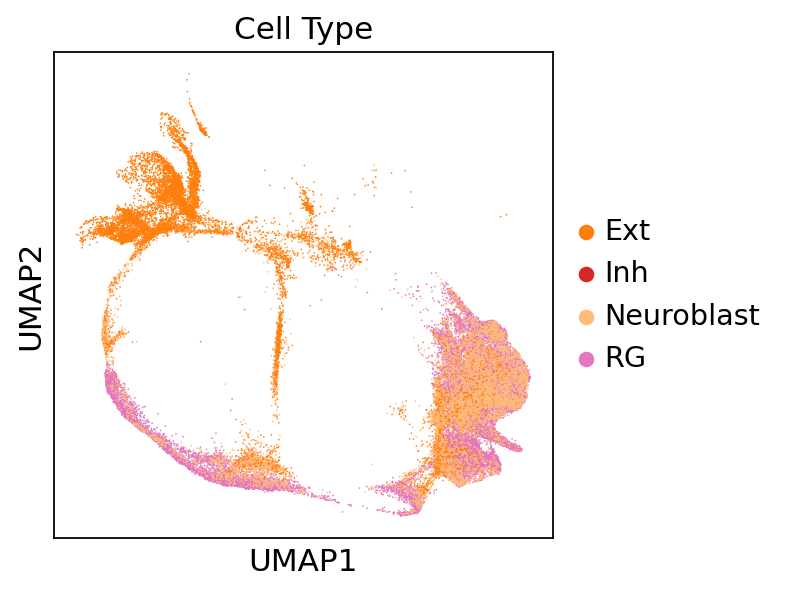

In [9]:
sc.pl.umap(adata_sub, color = "Cell Type")

In [10]:
adata_sub.obs

,batch,sampleID,Age,Assay,Stage,Race,PMI,Hemisphere,Library,Brain Region,...,Cell Type,Stage2,palantir_pseudotime,palantir_entropy,Lineage_1,Lineage_2,Lineage_3,top_33_pseudotime,bottom_33_pseudotime,middle_33_pseudotime
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
10X187_2:AACACACCAACCGTGC,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Cortex,...,RG,Fetal (1st trimester),0.000000,0.910641,True,True,True,False,True,False
10X187_2:GCAACATCATCGATCA,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Cortex,...,RG,Fetal (1st trimester),0.000055,0.910641,True,True,True,False,True,False
10X187_2:TTGAGTGTCTACAGGT,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Cortex,...,RG,Fetal (1st trimester),0.000068,0.910641,True,True,True,False,True,False
10X187_2:ACAGGGAAGACGAGCT,XDD:351,10X187_2,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Cortex,...,RG,Fetal (1st trimester),0.000079,0.910641,True,True,True,False,True,False
10X185_8:AGTGCCGCAGTTAGAA,XDD:351,10X185_8,98.0,10x Chromium 3' v3,Fetal (1st trimester),Unknown,Unknown,A,scRNA,Subcortex,...,RG,Fetal (1st trimester),0.000090,0.910641,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RL2108_GGTGTTAGTATACCCA-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,BA9,...,Ext,Neonatal,0.999770,0.027383,True,False,False,True,False,False
RL2108_TAGATCGAGCTGACCC-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,BA9,...,Ext,Neonatal,0.999831,0.027294,True,False,False,True,False,False
RL2108_AGACTCAAGTGCACTT-1,RL2108_179d_v3,RL2108,544.0,10x Chromium 3' v3,Neonatal,White,11,A,snRNA,BA9,...,Ext,Neonatal,0.999900,0.027196,True,False,False,True,False,False


In [11]:
adata_sub.obs["Lineage_1"].value_counts()

True    54595
Name: Lineage_1, dtype: int64

In [12]:
adata_sub.obs["top_33_pseudotime"].value_counts()

False    36579
True     18016
Name: top_33_pseudotime, dtype: int64

In [13]:
adata_sub.obs["middle_33_pseudotime"].value_counts()

False    36032
True     18563
Name: middle_33_pseudotime, dtype: int64

In [14]:
adata_sub.obs["bottom_33_pseudotime"].value_counts()

False    36579
True     18016
Name: bottom_33_pseudotime, dtype: int64

In [15]:
adata_sub.obs['Lineage_1_group'] = np.where(adata_sub.obs['top_33_pseudotime'] == True, "Top",
                                        np.where(adata_sub.obs['middle_33_pseudotime'] == True, "Middle", "Bottom"))

In [16]:
adata_sub.obs['Lineage_1_group'].value_counts()

Middle    18563
Top       18016
Bottom    18016
Name: Lineage_1_group, dtype: int64

In [17]:
adata_sub2 = adata_sub.copy()

In [20]:
adata_sub2

AnnData object with n_obs × n_vars = 54595 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_0.6', 'cluster_annotated', 'Leiden', 'Cell Type', 'Stage2', 'palantir_pseudotime', 'palantir_entropy', 'Lineage_1', 'Lineage_2', 'Lineage_3', 'top_33_pseudotime', 'bottom_33_pseudotime', 'middle_33_pseudotime', 'Lineage_1_group'
    uns: 'Brain Region_colors', 'Brain_Region_colors', 'Cell Type_colors', 'Stage_colors', 'cluster_annotated_colors', 'leiden_0.6_colors', 'log1p', 'ttest_pts', 'wilcoxon'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'logcounts', 'scaled'

In [19]:
adata_sub2.X = adata_sub2.layers["logcounts"]

In [21]:
sc.pp.scale(adata_sub2, max_value=10)

In [22]:
adata_sub2.layers["scaled"] = adata_sub2.X

# Heatmap

In [23]:
genes_list = ['HMGB1', 'HMGB3', 'CENPK', 'CENPV', 'BUB3', 'NHP2', 'SSBP1', 'CCT6A', 'RMI2', 'UBE2C', 'KIF22', 'MAPRE1', 'MCM7', 'SMC3', 'MIS18A', 'SGO1', 'MCM2', 'KIFC1', 'H1-10', 'TCP1', 'TTK', 'SMARCE1', 'MIS12', 'HNRNPD', 'PSRC1', 'SLX1A', 'SMC1A', 'HJURP', 'DNMT1', 'CHMP4A', 'KIF4A', 'SPC24', 'DHX9', 'KNSTRN', 'EZH2', 'GINS4', 'ZRANB3', 'EXO1', 'VPS4A', 'CENPI', 'RIOK2', 'WRAP73', 'MCM8', 'FBXO4', 'TEX14', 'RECQL', 'MAD2L1BP', 'EHMT2', 'MLH1', 'CENPT', 'H1-1', 'CCNE2', 'ESPL1', 'ERCC2', 'ERCC6L', 'TREX1', 'DCLRE1A', 'MAPK15', 'IHO1', 'RTEL1']

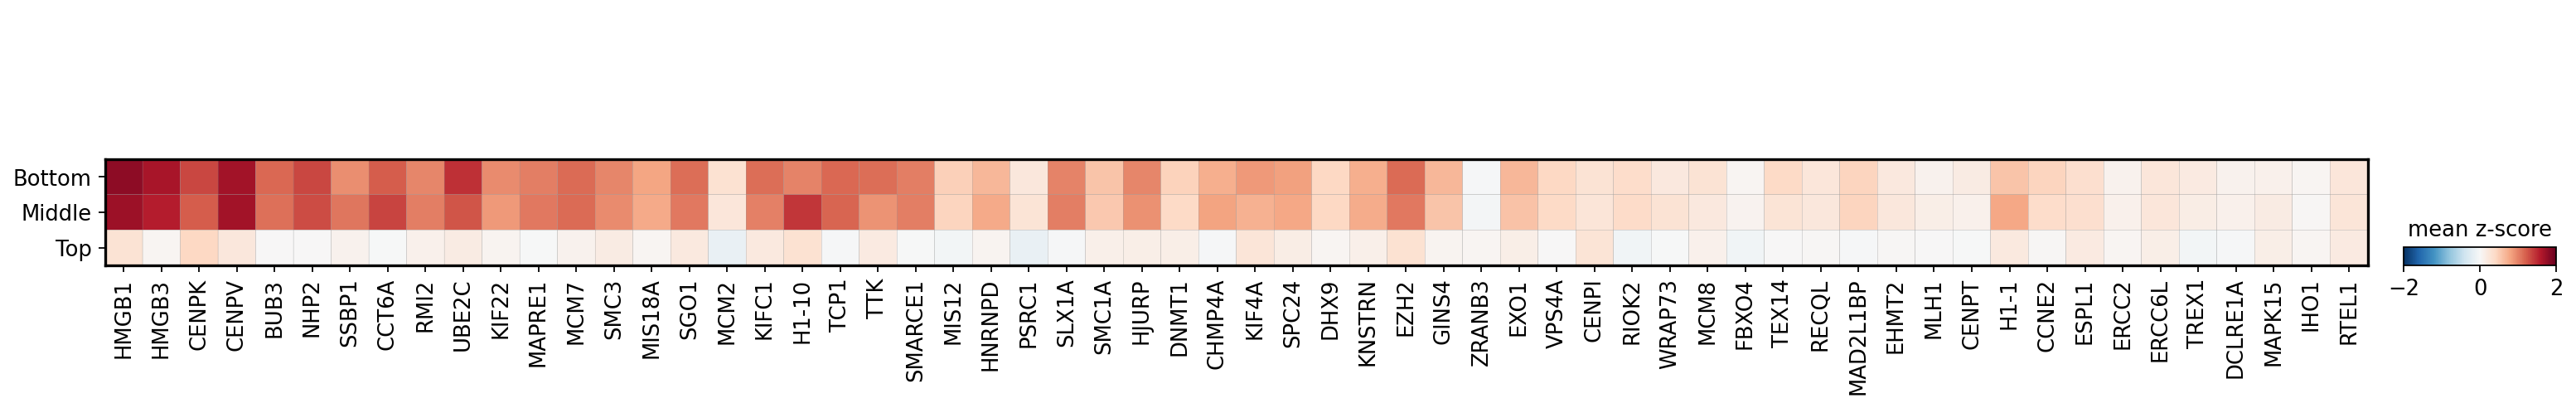

In [28]:
# chromosome organiziation
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

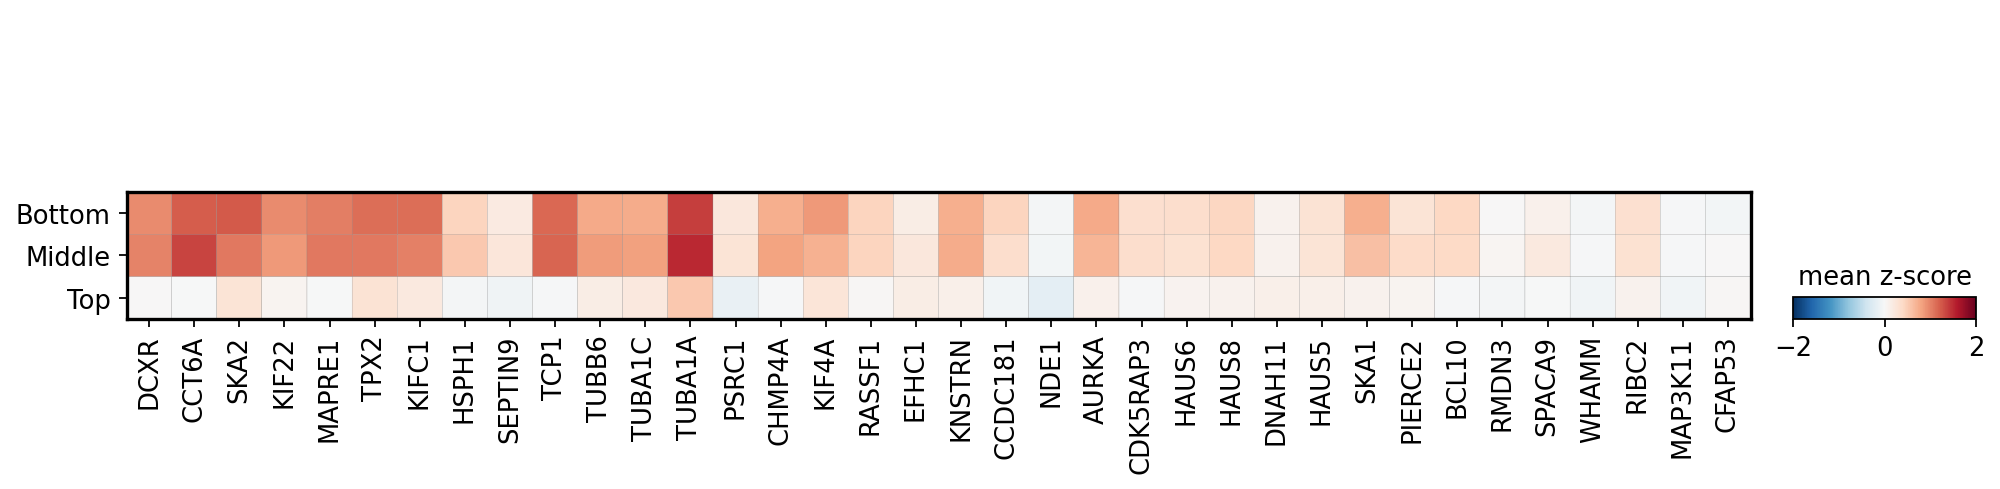

In [29]:
# microtubule
genes_list = ['DCXR', 'CCT6A', 'SKA2', 'KIF22', 'MAPRE1', 'TPX2', 'KIFC1', 'HSPH1', 'SEPTIN9', 'TCP1', 'TUBB6', 'TUBA1C', 'TUBA1A', 'PSRC1', 'CHMP4A', 'KIF4A', 'RASSF1', 'EFHC1', 'KNSTRN', 'CCDC181', 'NDE1', 'AURKA', 'CDK5RAP3', 'HAUS6', 'HAUS8', 'DNAH11', 'HAUS5', 'SKA1', 'PIERCE2', 'BCL10', 'RMDN3', 'SPACA9', 'WHAMM', 'RIBC2', 'MAP3K11', 'CFAP53']
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

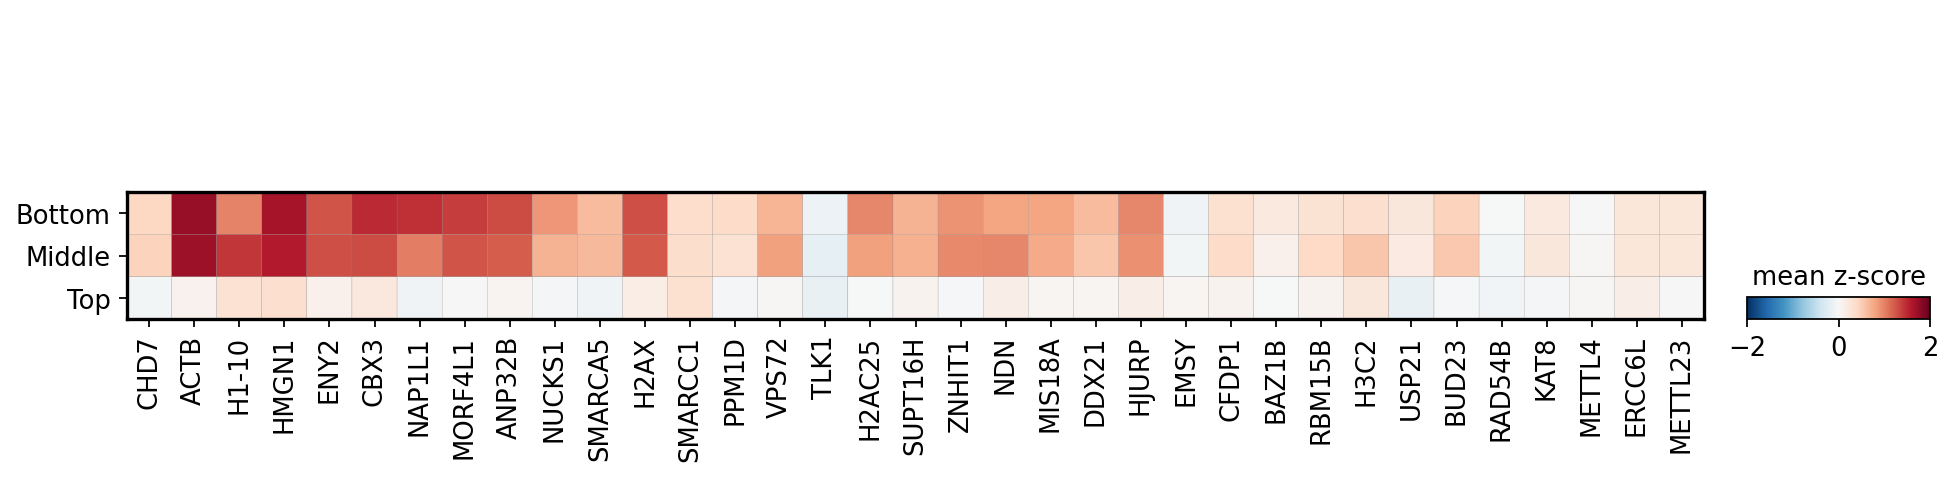

In [30]:
# chromatin organization
genes_list = ['CHD7', 'ACTB', 'H1-10', 'HMGN1', 'ENY2', 'CBX3', 'NAP1L1', 'MORF4L1', 'ANP32B', 'NUCKS1', 'SMARCA5', 'H2AX', 'SMARCC1', 'PPM1D', 'VPS72', 'TLK1', 'H2AC25', 'SUPT16H', 'ZNHIT1', 'NDN', 'MIS18A', 'DDX21', 'HJURP', 'EMSY', 'CFDP1', 'BAZ1B', 'RBM15B', 'H3C2', 'USP21', 'BUD23', 'RAD54B', 'KAT8', 'METTL4', 'ERCC6L', 'METTL23']
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

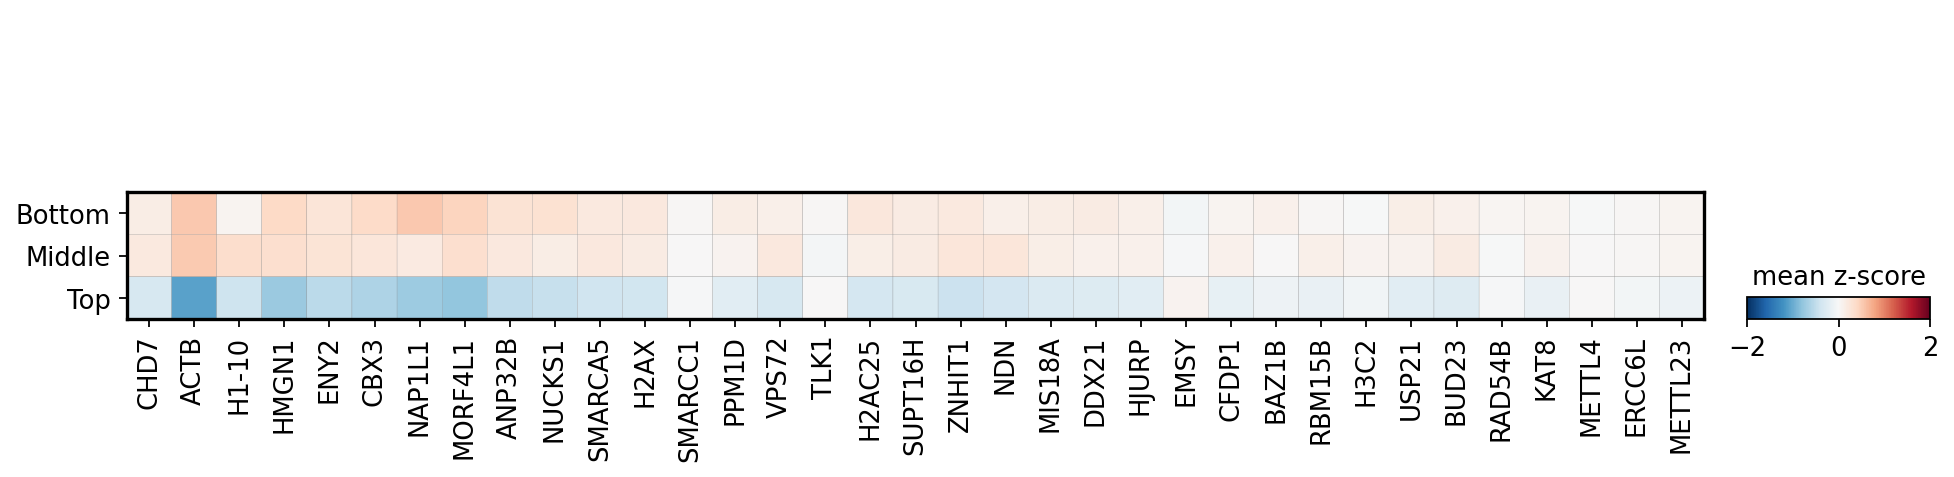

In [24]:
# chromatin organization
genes_list = ['CHD7', 'ACTB', 'H1-10', 'HMGN1', 'ENY2', 'CBX3', 'NAP1L1', 'MORF4L1', 'ANP32B', 'NUCKS1', 'SMARCA5', 'H2AX', 'SMARCC1', 'PPM1D', 'VPS72', 'TLK1', 'H2AC25', 'SUPT16H', 'ZNHIT1', 'NDN', 'MIS18A', 'DDX21', 'HJURP', 'EMSY', 'CFDP1', 'BAZ1B', 'RBM15B', 'H3C2', 'USP21', 'BUD23', 'RAD54B', 'KAT8', 'METTL4', 'ERCC6L', 'METTL23']
sc.pl.matrixplot(adata_sub2, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

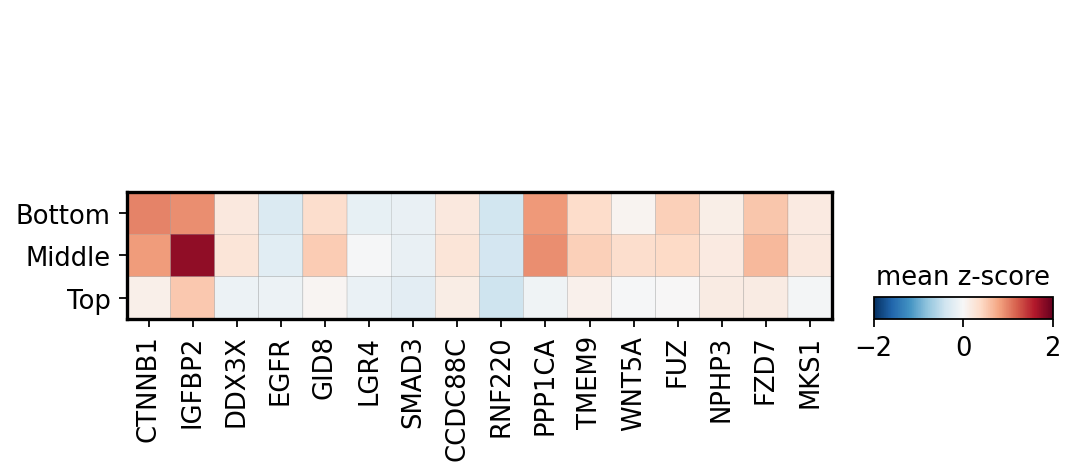

In [31]:
# regulation of canonical Wnt signaling pathway
genes_list = ['CTNNB1', 'IGFBP2', 'DDX3X', 'EGFR', 'GID8', 'LGR4', 'SMAD3', 'CCDC88C', 'RNF220', 'PPP1CA', 'TMEM9', 'WNT5A', 'FUZ', 'NPHP3', 'FZD7', 'MKS1']
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

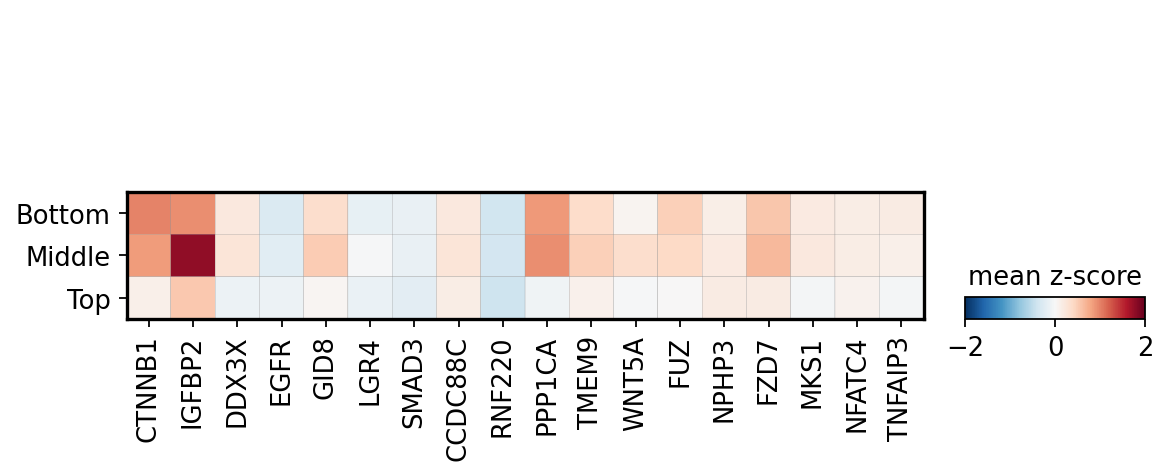

In [17]:
# regulation of canonical Wnt signaling pathway
genes_list = ['CTNNB1', 'IGFBP2', 'DDX3X', 'EGFR', 'GID8', 'LGR4', 'SMAD3', 'CCDC88C', 'RNF220', 'PPP1CA', 'TMEM9', 'WNT5A', 'FUZ', 'NPHP3', 'FZD7', 'MKS1', 'NFATC4', 'TNFAIP3']
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

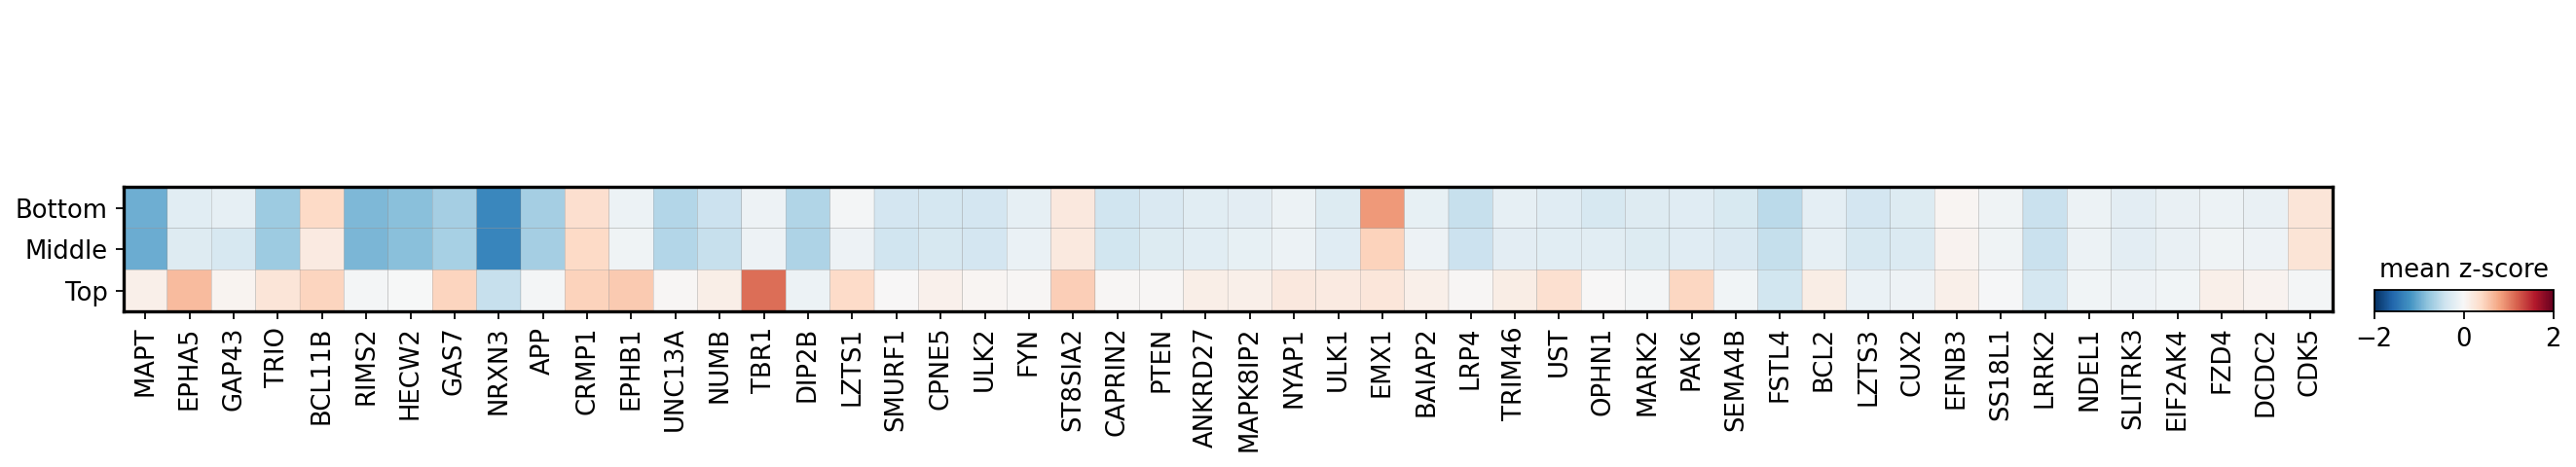

In [32]:
# neuron projection morphogenesis
genes_list = ['MAPT', 'EPHA5', 'GAP43', 'TRIO', 'BCL11B', 'RIMS2', 'HECW2', 'GAS7', 'NRXN3', 'APP', 'CRMP1', 'EPHB1', 'UNC13A', 'NUMB', 'TBR1', 'DIP2B', 'LZTS1', 'SMURF1', 'CPNE5', 'ULK2', 'FYN', 'ST8SIA2', 'CAPRIN2', 'PTEN', 'ANKRD27', 'MAPK8IP2', 'NYAP1', 'ULK1', 'EMX1', 'BAIAP2', 'LRP4', 'TRIM46', 'UST', 'OPHN1', 'MARK2', 'PAK6', 'SEMA4B', 'FSTL4', 'BCL2', 'LZTS3', 'CUX2', 'EFNB3', 'SS18L1', 'LRRK2', 'NDEL1', 'SLITRK3', 'EIF2AK4', 'FZD4', 'DCDC2', 'CDK5']
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

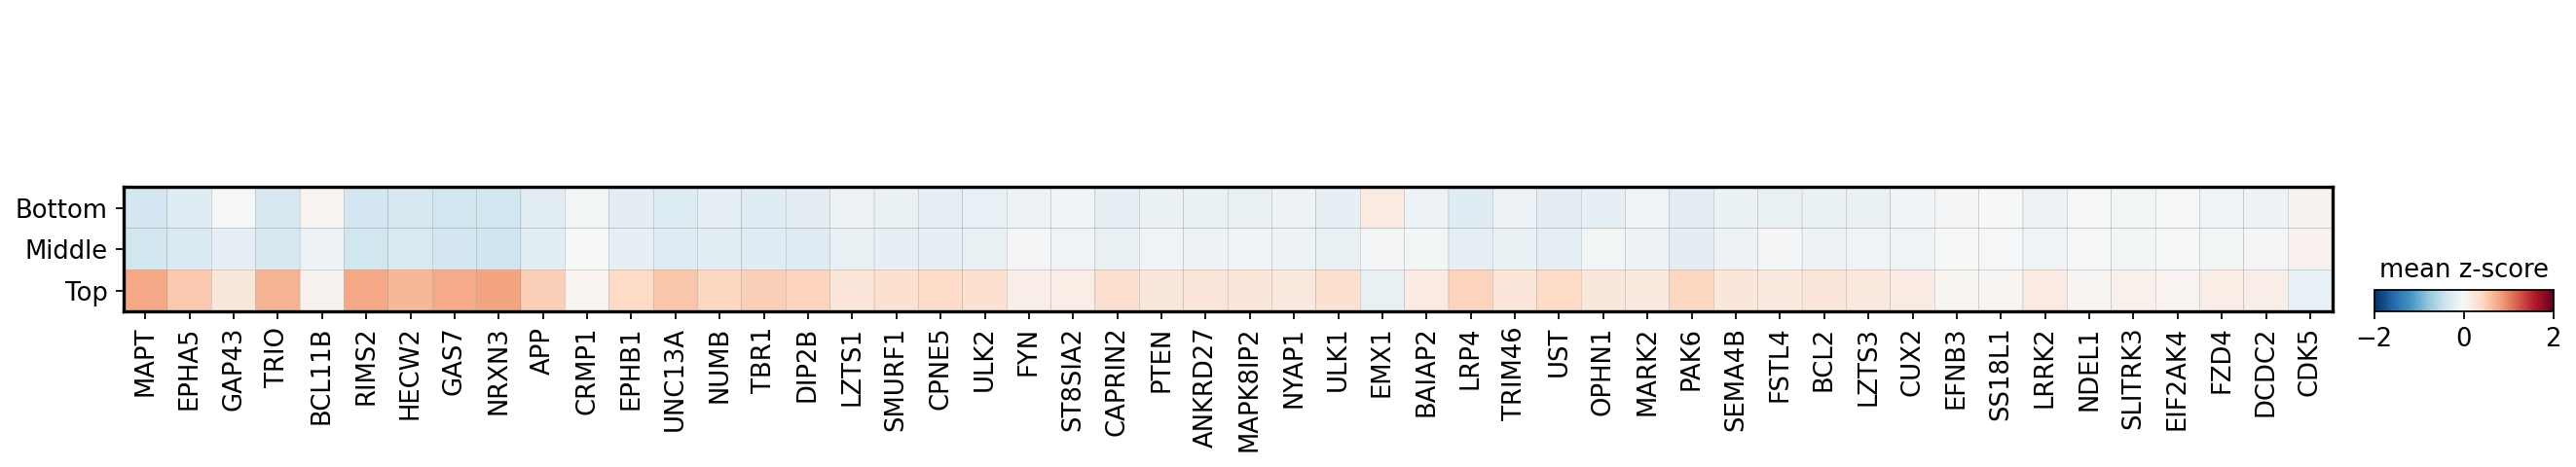

In [26]:
# neuron projection morphogenesis
genes_list = ['MAPT', 'EPHA5', 'GAP43', 'TRIO', 'BCL11B', 'RIMS2', 'HECW2', 'GAS7', 'NRXN3', 'APP', 'CRMP1', 'EPHB1', 'UNC13A', 'NUMB', 'TBR1', 'DIP2B', 'LZTS1', 'SMURF1', 'CPNE5', 'ULK2', 'FYN', 'ST8SIA2', 'CAPRIN2', 'PTEN', 'ANKRD27', 'MAPK8IP2', 'NYAP1', 'ULK1', 'EMX1', 'BAIAP2', 'LRP4', 'TRIM46', 'UST', 'OPHN1', 'MARK2', 'PAK6', 'SEMA4B', 'FSTL4', 'BCL2', 'LZTS3', 'CUX2', 'EFNB3', 'SS18L1', 'LRRK2', 'NDEL1', 'SLITRK3', 'EIF2AK4', 'FZD4', 'DCDC2', 'CDK5']
sc.pl.matrixplot(adata_sub2, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

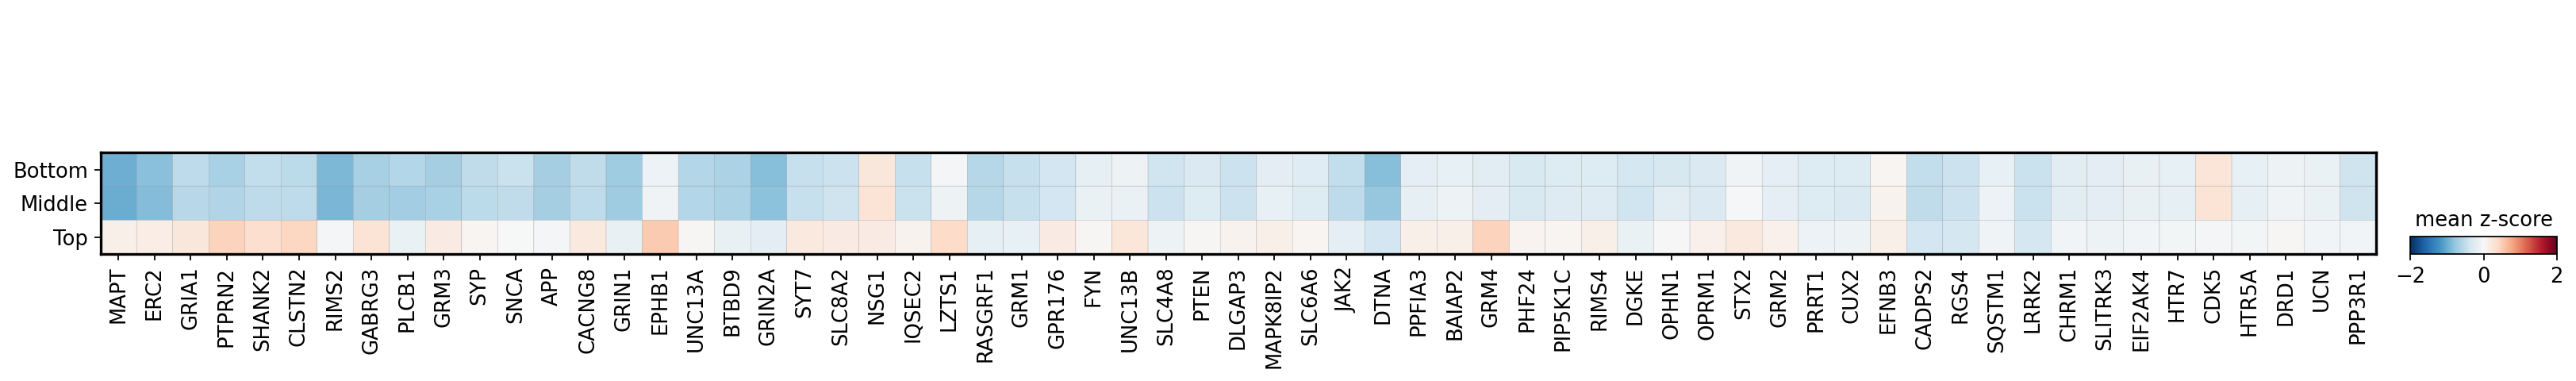

In [35]:
# chemical synaptic transmission
genes_list = ['MAPT', 'ERC2', 'GRIA1', 'PTPRN2', 'SHANK2', 'CLSTN2', 'RIMS2', 'GABRG3', 'PLCB1', 'GRM3', 'SYP', 'SNCA', 'APP', 'CACNG8', 'GRIN1', 'EPHB1', 'UNC13A', 'BTBD9', 'GRIN2A', 'SYT7', 'SLC8A2', 'NSG1', 'IQSEC2', 'LZTS1', 'RASGRF1', 'GRM1', 'GPR176', 'FYN', 'UNC13B', 'SLC4A8', 'PTEN', 'DLGAP3', 'MAPK8IP2', 'SLC6A6', 'JAK2', 'DTNA', 'PPFIA3', 'BAIAP2', 'GRM4', 'PHF24', 'PIP5K1C', 'RIMS4', 'DGKE', 'OPHN1', 'OPRM1', 'STX2', 'GRM2', 'PRRT1', 'CUX2', 'EFNB3', 'CADPS2', 'RGS4', 'SQSTM1', 'LRRK2', 'CHRM1', 'SLITRK3', 'EIF2AK4', 'HTR7', 'CDK5', 'HTR5A', 'DRD1', 'UCN', 'PPP3R1']
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

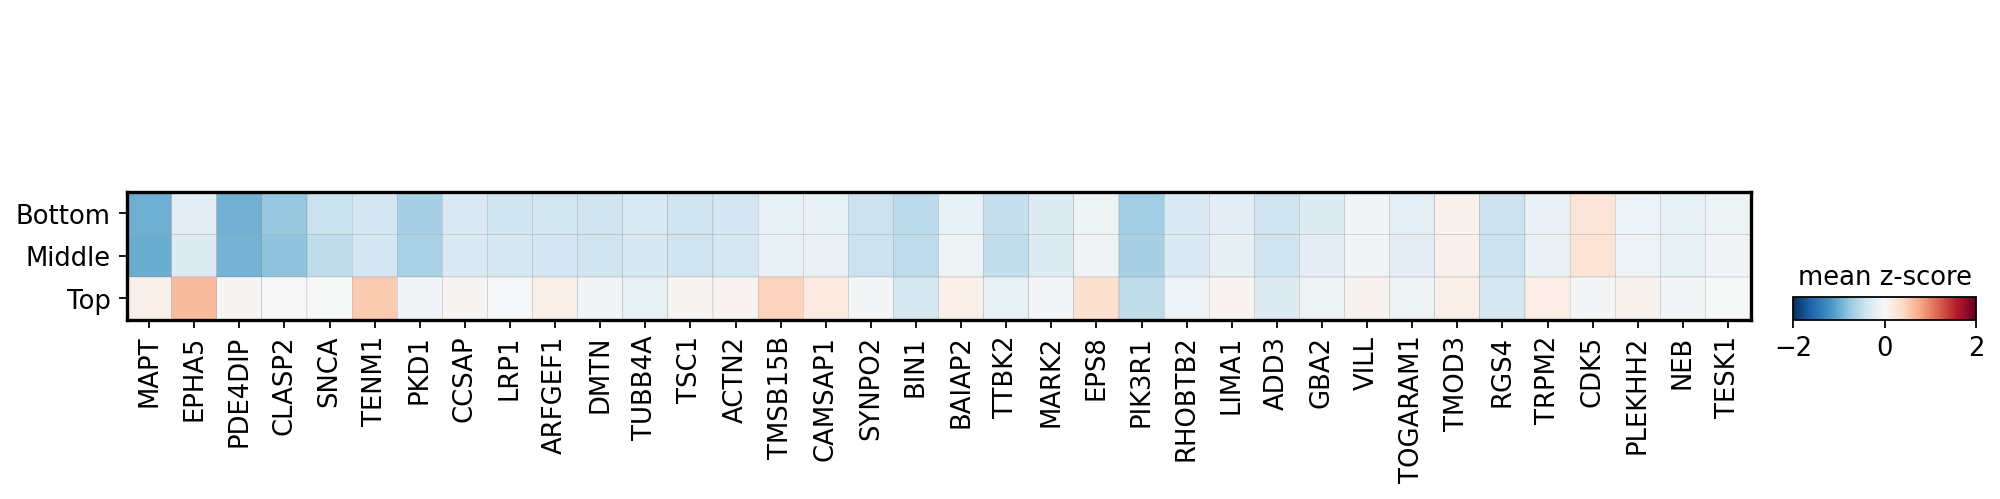

In [36]:
# Regulation of cytoskeleton organization
genes_list = ['MAPT', 'EPHA5', 'PDE4DIP', 'CLASP2', 'SNCA', 'TENM1', 'PKD1', 'CCSAP', 'LRP1', 'ARFGEF1', 'DMTN', 'TUBB4A', 'TSC1', 'ACTN2', 'TMSB15B', 'CAMSAP1', 'SYNPO2', 'BIN1', 'BAIAP2', 'TTBK2', 'MARK2', 'EPS8', 'PIK3R1', 'RHOBTB2', 'LIMA1', 'ADD3', 'GBA2', 'VILL', 'TOGARAM1', 'TMOD3', 'RGS4', 'TRPM2', 'CDK5', 'PLEKHH2', 'NEB', 'TESK1']
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                    colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

In [ ]:
# genes_list = ["HMGB1", "HMGB3", "CENPK", "CENPV", "KIF22", "MAPRE1", "MCM7", "MCM2", "KIFC1", "KIF4A", "EZH2", "KIF22", "TPX2", 'TUBA1C', 'TUBA1A', "AURKA", "CHD7", "ACTB", "CBX3", "NAP1L1", "H2AX", "CTNNB1", "IGFBP2", "DDX3X", "WNT5A", "FZD7", "EPHA5", "NRXN3", "PAK6", "PTEN", "LZTS1", "TBR1", "EPHB1", "TRIO", "GAS7", "GRIA1", "SHANK2", "GRM3"]


In [20]:
# genes_list = ["HMGB1", "HMGB3", "CENPK", "CENPV", "KIF22", "MAPRE1", "MCM7", "MCM2", "KIFC1", "KIF4A", "EZH2", "KIF22", "TPX2", 'TUBA1C', 'TUBA1A', "AURKA", "CHD7", "ACTB", "CBX3", "NAP1L1", "H2AX", 
# # "CTNNB1", "IGFBP2", "DDX3X", "WNT5A", "FZD7", 
# 'CTNNB1', 'IGFBP2', 'DDX3X', 'EGFR', 'GID8', 'LGR4', 'SMAD3', 'CCDC88C', 'RNF220', 'PPP1CA', 'TMEM9', 'WNT5A', 'FUZ', 'NPHP3', 'FZD7', 'MKS1', 'NFATC4', 'TNFAIP3',
# "EPHA5", "NRXN3", "PAK6", "PTEN", "LZTS1", "TBR1", "EPHB1", "TRIO", "GAS7", "GRIA1", "SHANK2", "GRM3"]

In [32]:
# genes_list = ["HMGB1", "HMGB3", "CENPK", "CENPV", "KIF22", "MAPRE1", "MCM7", "MCM2", "KIFC1", "KIF4A", "EZH2", "KIF22", "TPX2", 'TUBA1C', 'TUBA1A', "AURKA", "CHD7", "ACTB", "CBX3", "NAP1L1", "H2AX", "CTNNB1", "IGFBP2", "DDX3X", "GID8","PPP1CA", "TMEM9", "WNT5A", "FUZ", "FZD7", 
# "MAPT", "EPHA5", "TRIO", "NRXN3", "PAK6", "PTEN", "LZTS1", "TBR1", "EPHB1", "GAS7", "GRIA1", "SHANK2", "GRM3","GAS7", "EPHB1", "NUMB", "TBR1", "LZTS1", "CPNE5", "ULK2", "ST8SIA2", "PTEN", "ANKRD27", "MAPK8IP2", "NYAP1", "ULK1", "BAIAP2", "TRIM46", "UST", "PAK6", "BCL2", "FZD4", "DCDC2", 
# "ERC2", "GRIA1", "PTPRN2", "SHANK2", "CLSTN2", "GABRG3", "GRM3", "CACNG8", "EPHB1", "SYT7", "SLC8A2", "LZTS1", "GPR176", "UNC13B", "GRM4", "STX2",
# "EPHA5", "TENM1", "TMSB15B", "CAMSAP1",  "EPS8"]

In [37]:
# genes_list = ["HMGB1", "HMGB3", "CENPK", "CENPV", "KIF22", "MAPRE1", "MCM7", "MCM2", "KIFC1", "KIF4A", "EZH2", "KIF22", "TPX2", 'TUBA1C', 'TUBA1A', "AURKA", "CHD7", "ACTB", "CBX3", "NAP1L1", "H2AX", "CTNNB1", "IGFBP2", "DDX3X", "WNT5A", "FZD7", 
# "MAPT", "EPHA5", "NRXN3", "PAK6", "PTEN", "LZTS1", "TBR1", "EPHB1", "TRIO", "GAS7", "GRIA1", "SHANK2", "GRM3", 
# "TBR1", "CPNE5", "MAPK8IP2", "NYAP1", "BAIAP2", "TRIM46", "BCL2", "FZD4", "PTPRN2", "CLSTN2", "GABRG3", "CACNG8", "SYT7", "SLC8A2", "UNC13B", "GRM4", "STX2", "TENM1", "TMSB15B", "CAMSAP1", "EPS8"]

In [41]:
# genes_list = ["HMGB1", "HMGB3", "CENPK", "CENPV", "KIF22", "MAPRE1", "MCM7", "MCM2", "KIFC1", "KIF4A", "EZH2", "KIF22", "TPX2", 'TUBA1C', 'TUBA1A', "AURKA", "CHD7", "ACTB", "CBX3", "NAP1L1", "H2AX", "CTNNB1", "IGFBP2", "DDX3X", "WNT5A", "FZD7", 
# "EPHA5", "NRXN3", "PAK6", "PTEN", "LZTS1", "TBR1", "EPHB1", "TRIO", "GAS7", "GRIA1", "SHANK2", "GRM3", "FZD4","SYT7", "GRM4", "TENM1"]

In [47]:
# genes_list = ["HMGB1", "HMGB3", "CENPK", "CENPV", "KIF22", "MAPRE1", "MCM7", "MCM2", "KIFC1", "KIF4A", "EZH2", "KIF22", "TPX2", 'TUBA1C', 'TUBA1A', "AURKA", "CHD7", "ACTB", "CBX3", "NAP1L1", "H2AX", 
# 'CTNNB1', 'IGFBP2', 'DDX3X', 'GID8', 'LGR4', 'CCDC88C',  'PPP1CA', 'TMEM9', 'WNT5A', 'FUZ', 'NPHP3', 'FZD7', 'MKS1',
# "EPHA5", "NRXN3", "PAK6", "PTEN", "LZTS1", "TBR1", "EPHB1", "TRIO", "GAS7", "GRIA1", "SHANK2", "GRM3", "FZD4","SYT7", "GRM4", "TENM1"]

In [27]:
genes_list = [
"HMGB1", "HMGB3", "CENPK", "CENPV",  "MCM7", "MCM2", "EZH2", # Chromosome organization
"KIF22", "MAPRE1", "KIFC1", "KIF4A", "TPX2", 'TUBA1C', 'TUBA1A', "AURKA", # Microtubule
"CHD7", "ACTB", "CBX3", "NAP1L1", "H2AX", # Chromatin organization
'CTNNB1', 'IGFBP2', 'DDX3X', 'GID8', 'CCDC88C',  'PPP1CA', 'TMEM9', 'WNT5A', 'FUZ', 'NPHP3', 'FZD7', 'MKS1', # WNT
"EPHA5", "NRXN3", "PAK6", "PTEN", "LZTS1", "TBR1", "TRIO", "GAS7", # Neuron projection morphogenesis
"GRIA1", "SHANK2", "GRM3", "SYT7", "GRM4", "EPHB1", ] # synaptic transmission


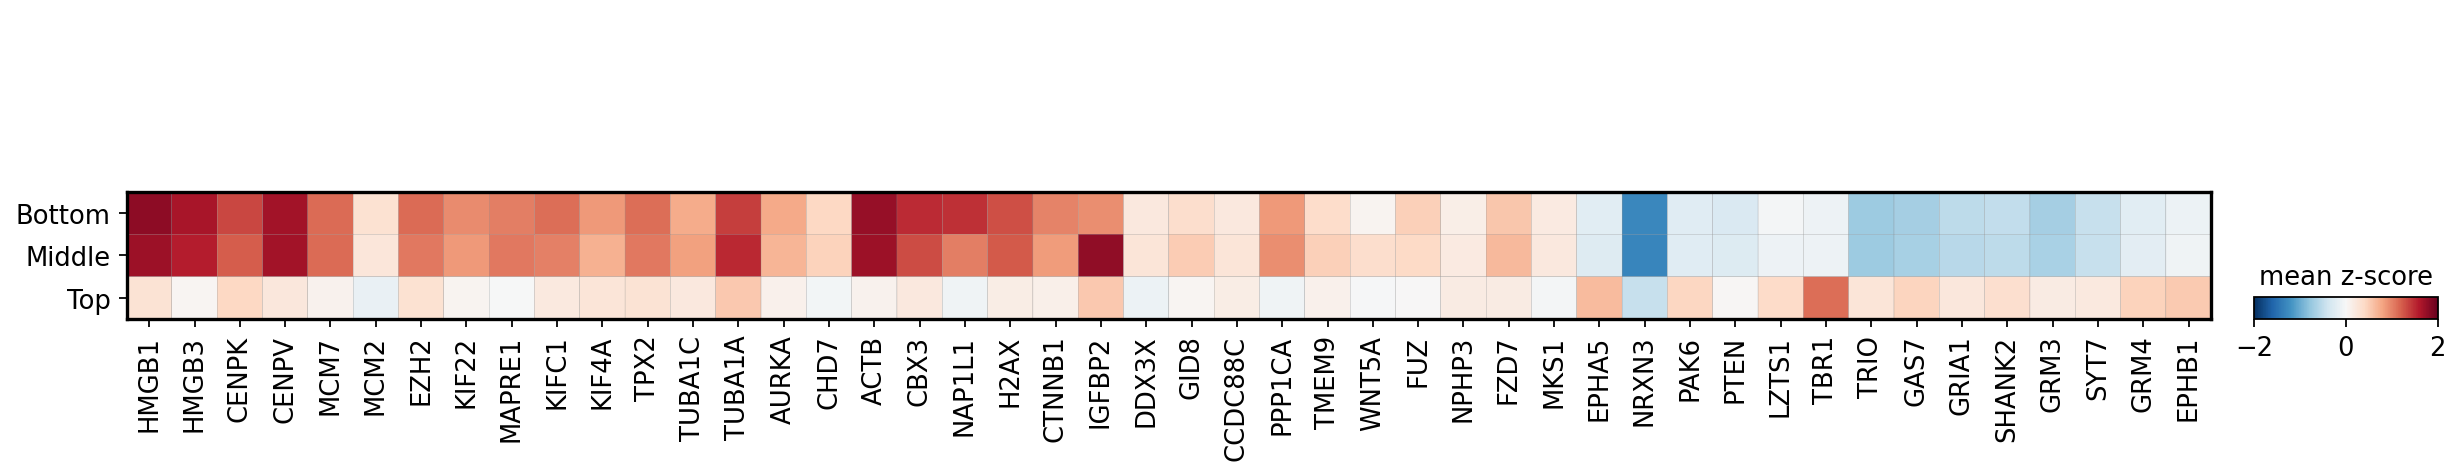

In [52]:
sc.pl.matrixplot(adata_sub, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                 save = "tmp.pdf",
                 colorbar_title="mean z-score", vmin=-2,vmax=2,cmap="RdBu_r",)

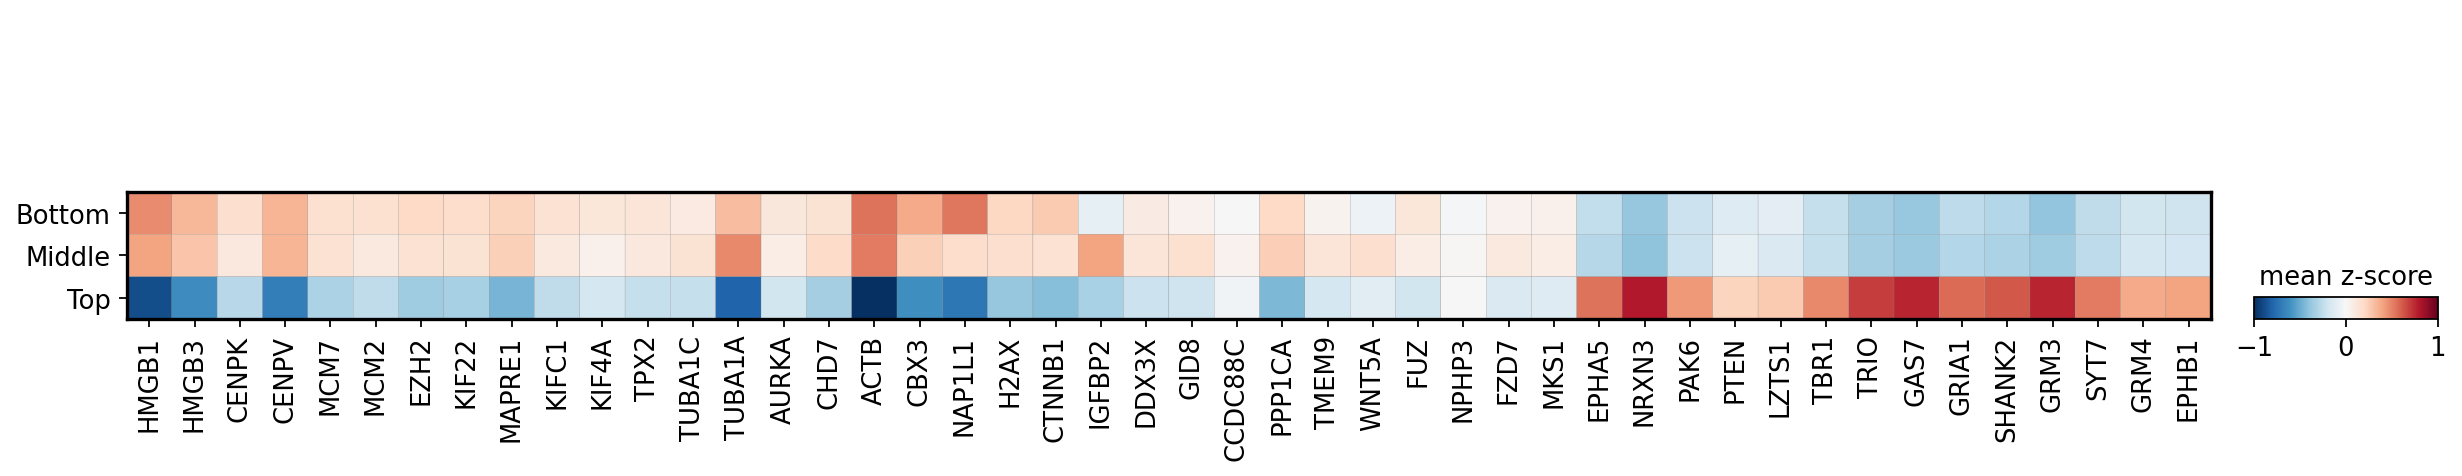

In [39]:
sc.pl.matrixplot(adata_sub2, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                #  save = "tmp.pdf",
                 colorbar_title="mean z-score", vmin=-1,vmax=1,cmap="RdBu_r",)

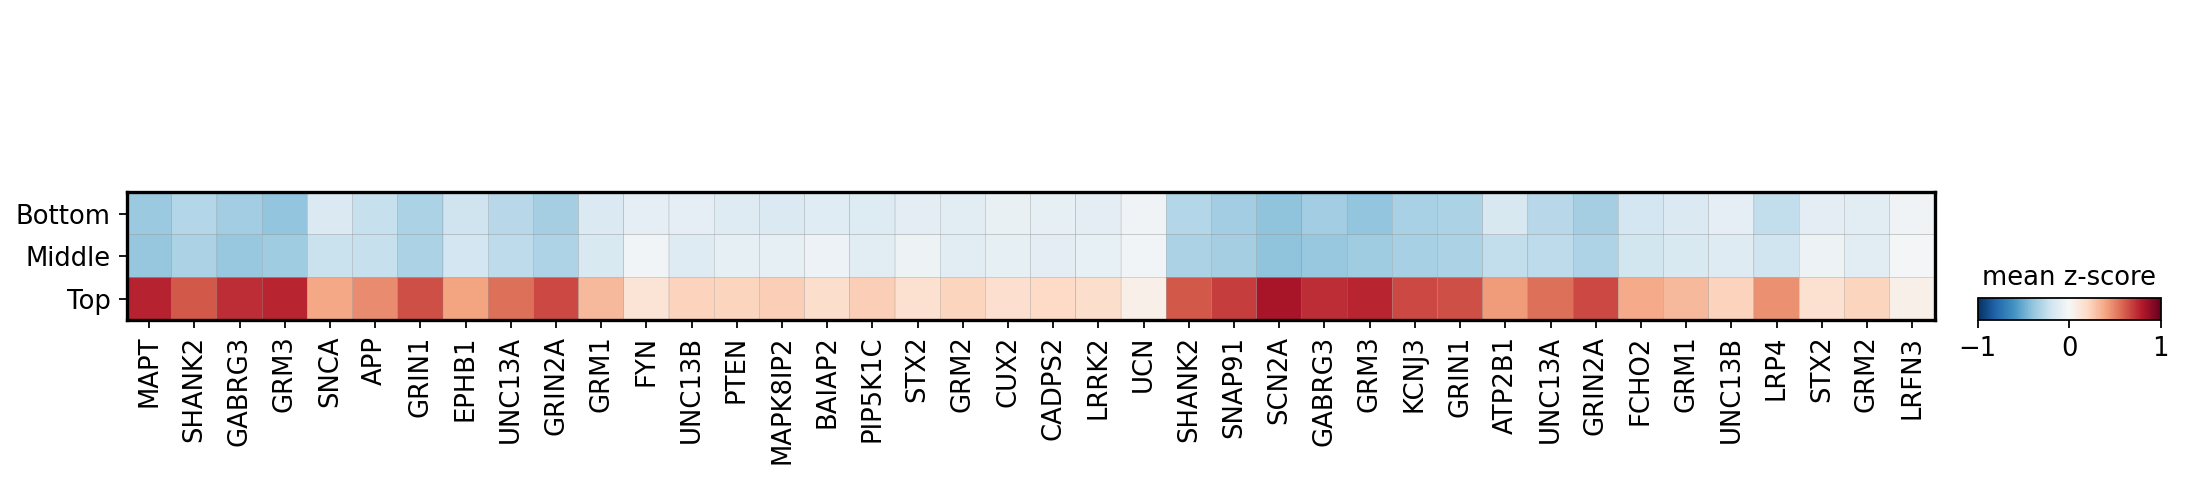

In [41]:
genes_synapse = ['MAPT', 'SHANK2', 'GABRG3', 'GRM3', 'SNCA', 'APP',  'GRIN1', 'EPHB1', 'UNC13A', 'GRIN2A', 'GRM1',  'FYN', 'UNC13B', 'PTEN', 'MAPK8IP2',  'BAIAP2', 'PIP5K1C', 'STX2', 'GRM2', 'CUX2', 'CADPS2', 'LRRK2', 'UCN', 'SHANK2', 'SNAP91', 'SCN2A', 'GABRG3', 'GRM3', 'KCNJ3', 'GRIN1', 'ATP2B1',  'UNC13A', 'GRIN2A',  'FCHO2', 'GRM1', 'UNC13B', 'LRP4', 'STX2', 'GRM2', 'LRFN3'
]

sc.pl.matrixplot(adata_sub2, genes_synapse, layer = "scaled", groupby = "Lineage_1_group",
                #  save = "tmp.pdf",
                 colorbar_title="mean z-score", vmin=-1,vmax=1,cmap="RdBu_r",)

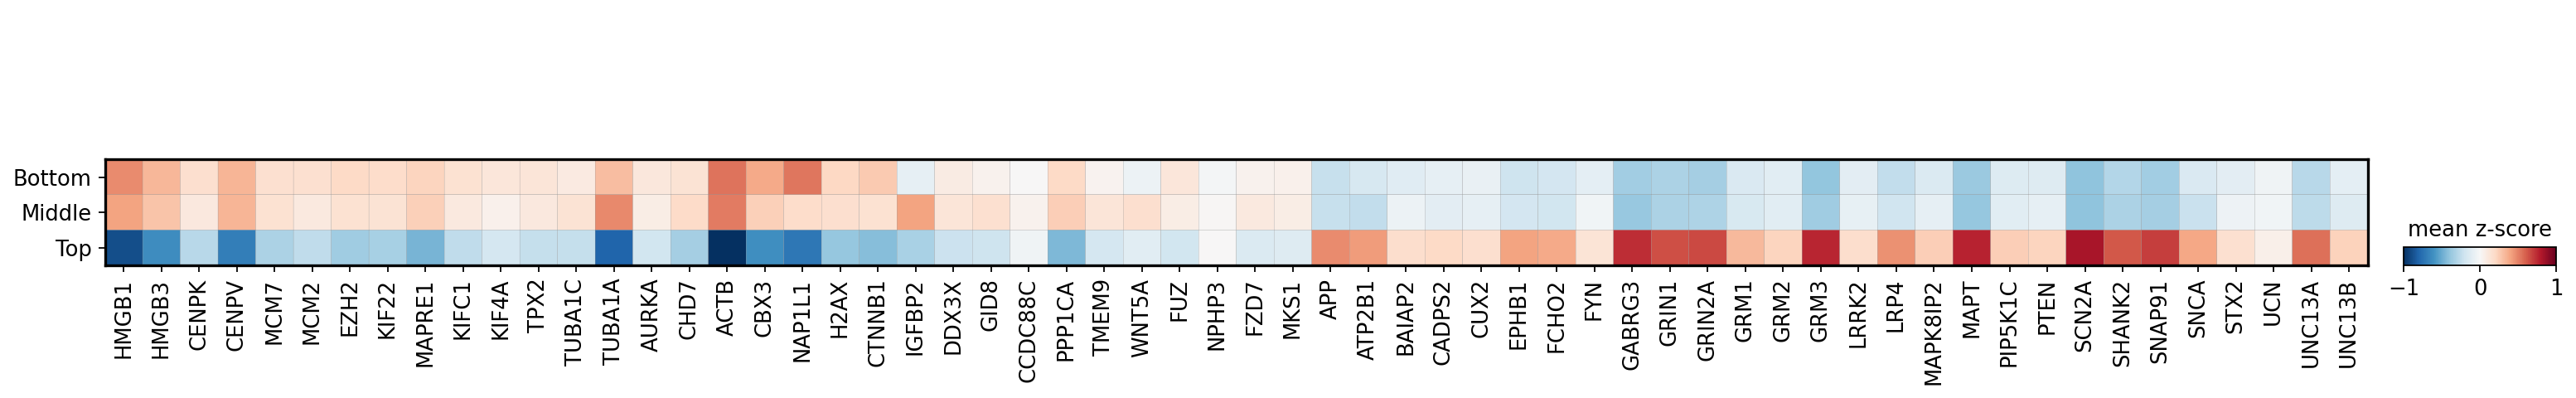

In [43]:
genes_list = [
"HMGB1", "HMGB3", "CENPK", "CENPV",  "MCM7", "MCM2", "EZH2", # Chromosome organization
"KIF22", "MAPRE1", "KIFC1", "KIF4A", "TPX2", 'TUBA1C', 'TUBA1A', "AURKA", # Microtubule
"CHD7", "ACTB", "CBX3", "NAP1L1", "H2AX", # Chromatin organization
'CTNNB1', 'IGFBP2', 'DDX3X', 'GID8', 'CCDC88C',  'PPP1CA', 'TMEM9', 'WNT5A', 'FUZ', 'NPHP3', 'FZD7', 'MKS1', # WNT
'APP', 'ATP2B1', 'BAIAP2', 'CADPS2', 'CUX2', 'EPHB1', 'FCHO2', 'FYN', 'GABRG3', 'GRIN1', 'GRIN2A', 'GRM1', 'GRM2', 'GRM3', 'LRRK2', 'LRP4', 'MAPK8IP2', 'MAPT', 'PIP5K1C', 'PTEN', 'SCN2A', 'SHANK2', 'SNAP91', 'SNCA', 'STX2', 'UCN', 'UNC13A', 'UNC13B'
]

sc.pl.matrixplot(adata_sub2, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                #  save = "tmp.pdf",
                 colorbar_title="mean z-score", vmin=-1,vmax=1,cmap="RdBu_r",)

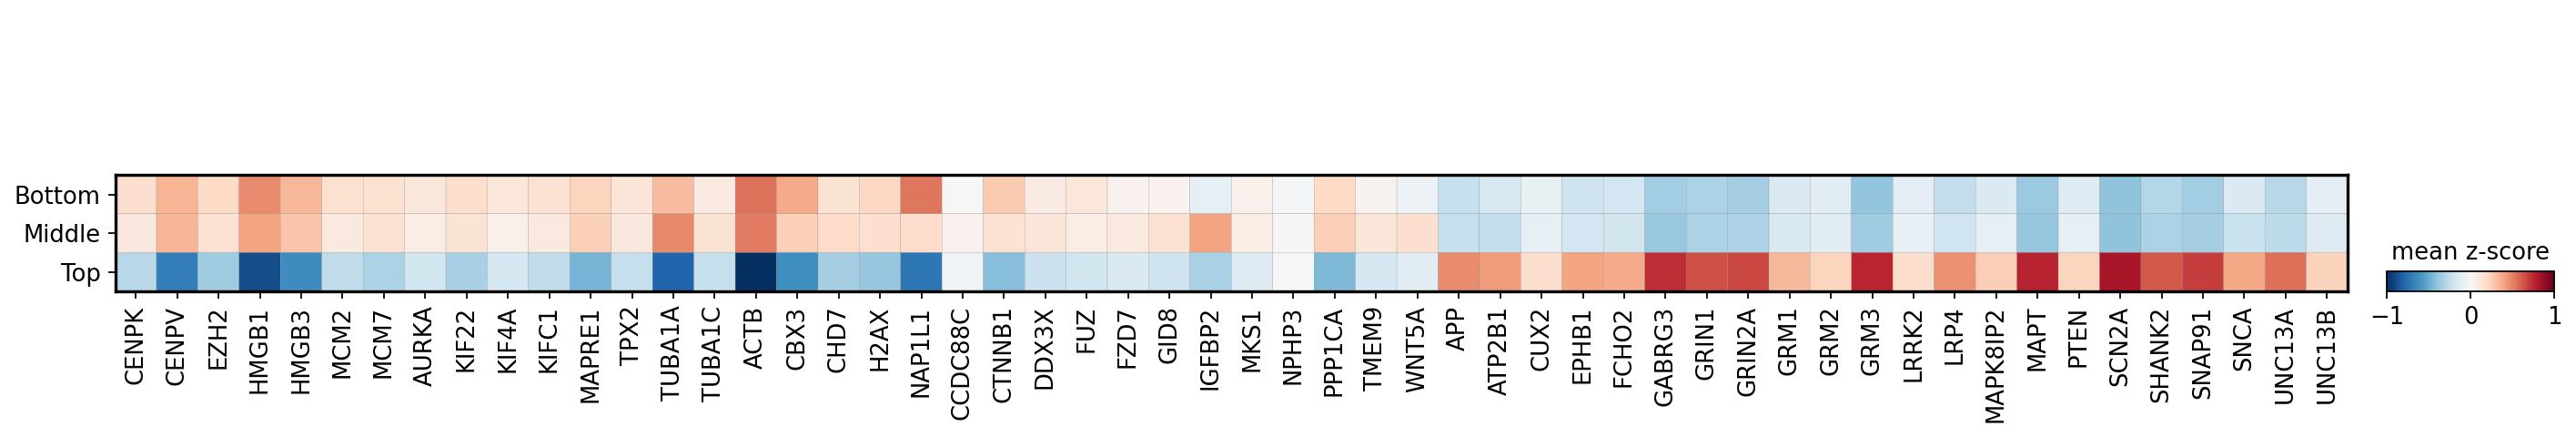

In [47]:
genes_list = [
'CENPK', 'CENPV', 'EZH2', 'HMGB1', 'HMGB3', 'MCM2', 'MCM7', # Chromosome organization
'AURKA', 'KIF22', 'KIF4A', 'KIFC1', 'MAPRE1', 'TPX2', 'TUBA1A', 'TUBA1C', # Microtubule
'ACTB', 'CBX3', 'CHD7', 'H2AX', 'NAP1L1', # Chromatin organization
'CCDC88C', 'CTNNB1', 'DDX3X', 'FUZ', 'FZD7', 'GID8', 'IGFBP2', 'MKS1', 'NPHP3', 'PPP1CA', 'TMEM9', 'WNT5A', # WNT
'APP', 'ATP2B1', 'CUX2', 'EPHB1', 'FCHO2', 'GABRG3', 'GRIN1', 'GRIN2A', 'GRM1', 'GRM2', 'GRM3', 'LRRK2', 'LRP4', 'MAPK8IP2', 'MAPT', 'PTEN', 'SCN2A', 'SHANK2', 'SNAP91', 'SNCA', 'UNC13A', 'UNC13B'
]

sc.pl.matrixplot(adata_sub2, genes_list, layer = "scaled", groupby = "Lineage_1_group",
                  save = "tmp_snc2a.pdf",
                 colorbar_title="mean z-score", vmin=-1,vmax=1,cmap="RdBu_r",)

In [53]:
adata_sub.obs["Stage"].value_counts()

Fetal (1st trimester)    38828
Fetal (2nd trimester)    10143
Neonatal                  2805
Childhood (1-6Y)          1162
Fetal (3rd trimester)      957
Childhood (6-12Y)          440
Adolescence (12-20Y)       260
Name: Stage, dtype: int64

In [ ]:
# adata_sub.obs["Stage2"] = ifelse(adata_sub.obs["Stage"] %in% c("Fetal (1st trimester)", "Fetal (2nd trimester)", "Fetal (3rd trimester)"), "Prenatal", "Postnatal")

In [48]:
adata_sub2.obs["Stage2"] = adata_sub2.obs["Stage"].apply(lambda x: "Prenatal" if x in ["Fetal (1st trimester)", "Fetal (2nd trimester)", "Fetal (3rd trimester)"] else "Postnatal")
adata_sub2.obs["Stage2"].value_counts()

Prenatal     49928
Postnatal     4667
Name: Stage2, dtype: int64

In [56]:
adata_sub.obs[["Stage", "Stage2"]].value_counts()

Stage                  Stage2   
Fetal (1st trimester)  Prenatal     38828
Fetal (2nd trimester)  Prenatal     10143
Neonatal               Postnatal     2805
Childhood (1-6Y)       Postnatal     1162
Fetal (3rd trimester)  Prenatal       957
Childhood (6-12Y)      Postnatal      440
Adolescence (12-20Y)   Postnatal      260
dtype: int64

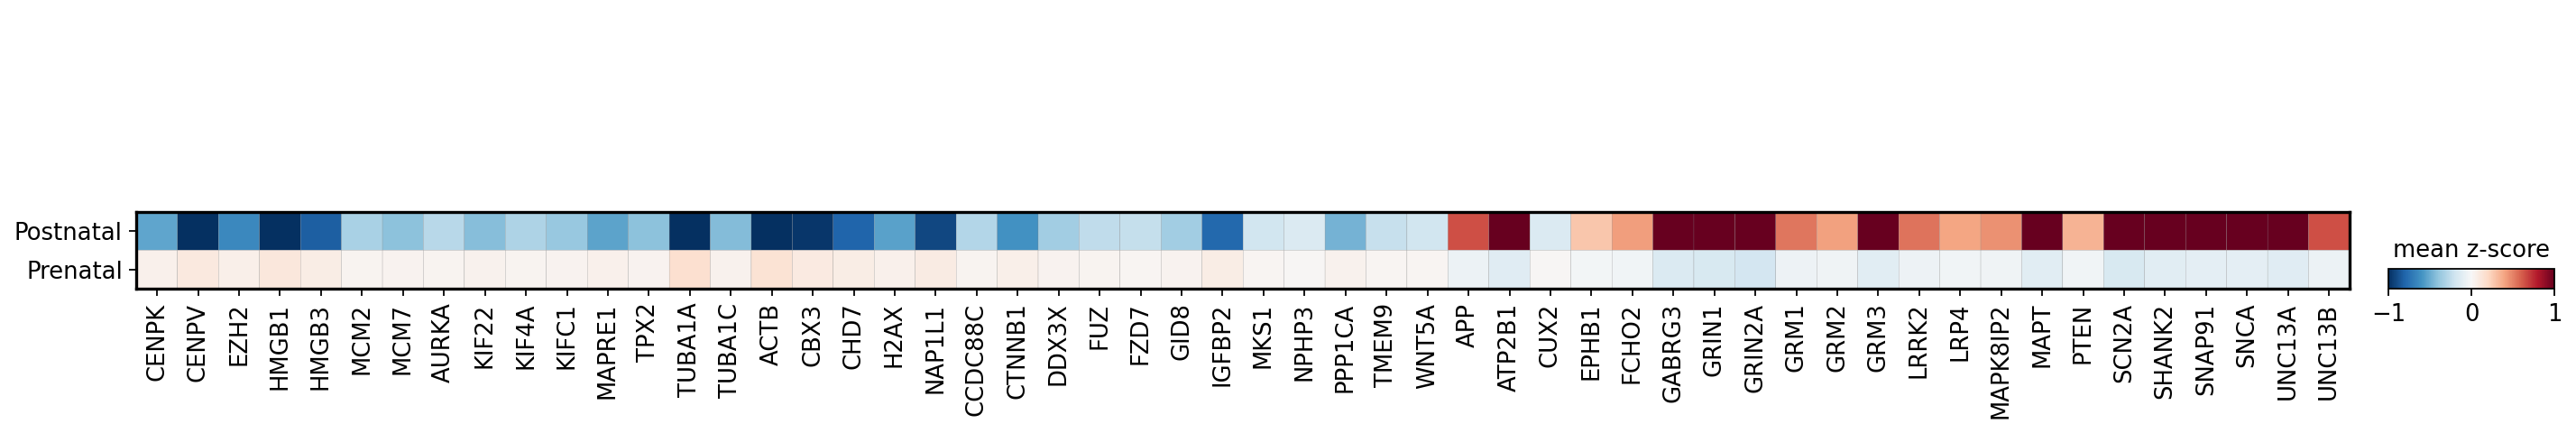

In [50]:
sc.pl.matrixplot(adata_sub2, genes_list, layer = "scaled", groupby = "Stage2",
                 save = "tmp2_scn2a.pdf",
                 colorbar_title="mean z-score", vmin=-1,vmax=1,cmap="RdBu_r",)